In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('netflix_titles.csv')

In [6]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(8807, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
descr

In [12]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.dropna(subset=['country', 'rating'], inplace=True)

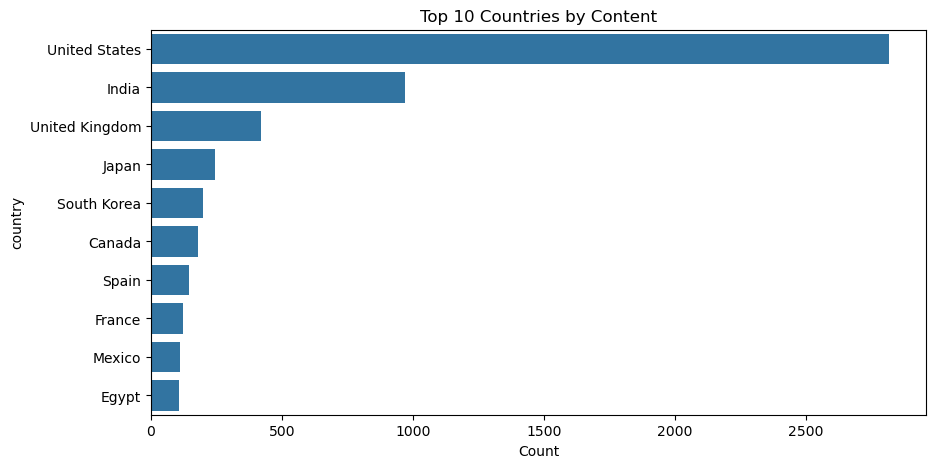

In [14]:
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries by Content')
plt.xlabel('Count')
plt.show()

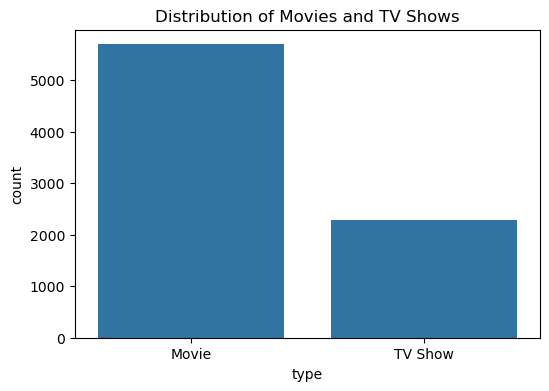

In [16]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Distribution of Movies and TV Shows')
plt.show()

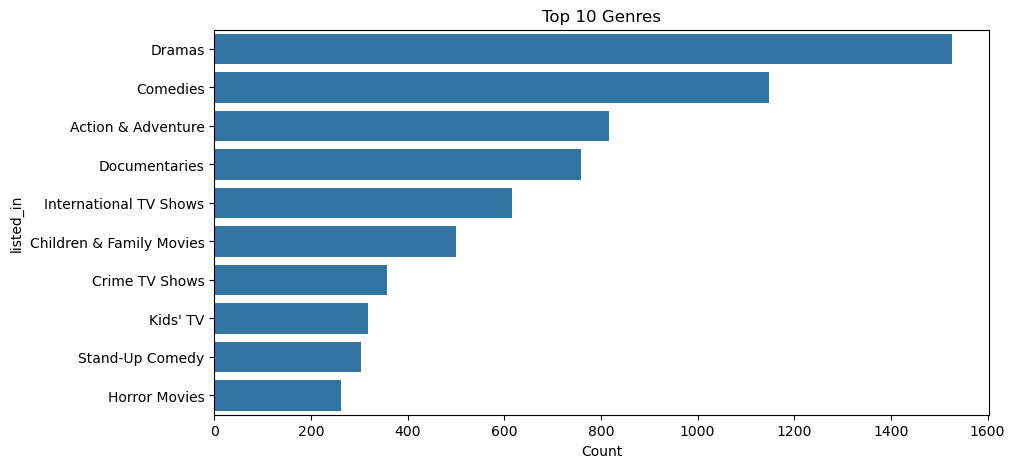

In [18]:
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
top_genres = df['listed_in'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.show()